In [352]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
training_path='./data/Training'
validation_path='./data/Validation'
training_folders=os.listdir(training_path)
validation_folders=os.listdir(validation_path)
training_folders

['Evyatar Cohen',
 'Nofar Social_Nuero',
 'Oriya Social_Nuero',
 'Orya Kalmanovitz',
 'Revital Marbel',
 'Shahar Terner',
 'Shelly Social_Nuero',
 'Yael Hagai',
 'Yoel Raz']

In [354]:
#df=pd.DataFrame()
train_df=pd.DataFrame()
test_df=pd.DataFrame()

for folder in training_folders:
    for file in os.listdir(training_path+'/'+folder):
        #t_df=pd.read_csv(training_path+'/'+folder+'/'+file)
        train_df=pd.concat([train_df,createDF(training_path+'/'+folder+'/'+file)])
        #train_df.reset_index(drop=True)
       # break
for folder in validation_folders:
    for file in os.listdir(validation_path+'/'+folder):
        test_df=pd.concat([test_df,createDF(validation_path+'/'+folder+'/'+file)])
        
train_df.reset_index(drop=True,inplace=True)
test_df.reset_index(drop=True,inplace=True)

pd.set_option("display.max_columns", None)
#df[" Frame ID"].value_counts()
#df=createDF(training_path+'/'+'Evyatar Cohen'+'/'+'Evyatar636771054555711409Alone.csv')
#df=pd.read_csv(training_path+'/'+'Evyatar Cohen'+'/'+'Evyatar636771052727603804Spontan.csv')
#os.listdir(training_path+'/'+"Evyatar Cohen")
#df.columns
#time_to_drop=math.ceil(df["Time"][0])+7
#df[df["Time"]>time_to_drop]
#df.join() 
train_df=train_df.drop(columns=' Frame ID')
test_df=test_df.drop(columns=' Frame ID')
train_df[" Hand Type_x"] = train_df[" Hand Type_x"].replace({'left': 0, 'right': 1})
test_df[" Hand Type_x"] = test_df[" Hand Type_x"].replace({'left': 0, 'right': 1})
train_df[" Hand Type_y"] = train_df[" Hand Type_y"].replace({'left': 0, 'right': 1})
test_df[" Hand Type_y"] = test_df[" Hand Type_y"].replace({'left': 0, 'right': 1})

In [353]:
def createDF(path):
    init_df=pd.read_csv(path)
    time_to_drop=math.ceil(init_df["Time"][0])+7
    init_df=init_df[init_df["Time"]>time_to_drop]
    if 'Alone' in path:
        o=pd.read_csv('./data/HandRight.csv')# o for other df
        init_df.insert(loc=1,column='label',value=0)
        init_df=init_df[init_df[' Hand Type']=='left']
        init_df=init_df.drop(columns=' # hands',axis=1)
        o=o.drop(columns=[' # hands','Time'],axis=1)
        o=o[o[' Hand Type']=='right']
       # print(o['Time'][0])
        o=o.drop([' Frame ID'],axis=1)
        o=o.iloc[:len(init_df)]
        o=o.reset_index(drop=True)
        init_df=init_df.reset_index(drop=True)
        init_df= pd.merge(init_df,o,left_index=True,right_index=True,how='left')
        
    else:
        init_df=init_df[init_df[' # hands']==2]
        init_df=init_df.drop(columns=' # hands',axis=1)
        if 'Sync' in file:
            init_df.insert(loc=1,column='label',value=1)
        if 'Spontan' in file:
            init_df.insert(loc=1,column='label',value=2)
        left_hand=init_df[init_df[' Hand Type']=='left']
        right_hand=init_df[init_df[' Hand Type']=='right']
        left_hand.reset_index(drop=True,inplace=True)
        right_hand.reset_index(drop=True,inplace=True)
        init_df=pd.merge(left_hand,right_hand, how='inner', on=["Time"," Frame ID","label"])  
        #init_df=pd.merge(init_df[init_df[' Hand Type']=='left'], init_df[init_df[' Hand Type']=='right'], how='inner', on=["Time"," Frame ID","label"])
    init_df=init_df.dropna()
    init_df = init_df[init_df.index%10 == 9]
    return init_df

<AxesSubplot:xlabel='label', ylabel='count'>

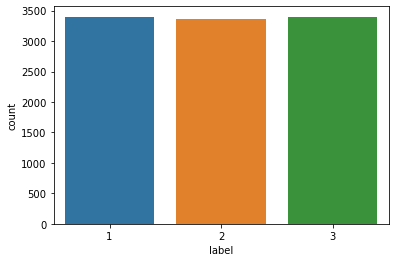

In [339]:
#df[df[" Frame ID"].value_counts==1]
sns.countplot(data=train_df,x='label')


In [340]:
train_df['label'].value_counts()

1    3400
3    3396
2    3370
Name: label, dtype: int64

In [229]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
#mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Time", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=train_df)

1    34037
3    34001
2    33733
Name: label, dtype: int64

In [302]:
# sns.pairplot(data=train_df,
#             y_vars=['Time'],
#             x_vars=[' Position X_x',
#        ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
#        ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
#        ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
#        ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
#        ' Pinch Strength_x', ' Position X_y', ' Position Y_y',
#        ' Position Z_y', ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y',
#        ' Pitch_y', ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
#        ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
#        ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y'],
#             kind='scatter',plot_kws={'color':'b','alpha':0.1},palette='muted')
train_df['label']

0         3
1         3
2         3
3         3
4         3
         ..
101766    2
101767    2
101768    2
101769    2
101770    2
Name: label, Length: 101771, dtype: int64

In [344]:
#train_df.info()
#train_df.reset_index(drop=True)
#train_df.info()
train_df

,Time,label,Hand Type_x,Position X_x,Position Y_x,Position Z_x,Velocity X_x,Velocity Y_x,Velocity Z_x,Pitch_x,Roll_x,Yaw_x,Wrist Pos X_x,Wrist Pos Y_x,Wrist Pos Z_x,Elbow pos X_x,Elbow Pos Y_x,Elbow Pos Z_x,Grab Strenth_x,Grab Angle_x,Pinch Strength_x,Hand Type_y,Position X_y,Position Y_y,Position Z_y,Velocity X_y,Velocity Y_y,Velocity Z_y,Pitch_y,Roll_y,Yaw_y,Wrist Pos X_y,Wrist Pos Y_y,Wrist Pos Z_y,Elbow pos X_y,Elbow Pos Y_y,Elbow Pos Z_y,Grab Strenth_y,Grab Angle_y,Pinch Strength_y
0,343.1552,3,0,-114.69430,242.6570,-9.972559,-82.28933,386.41130,-114.18180,1.346878,0.382191,1.474913,-178.4730,214.4584,-12.161470,-300.8841,-2.874147,-45.28082,0.352719,1.681010,0.0,1,149.11180,200.5923,-41.040560,-82.828540,-98.026190,-46.982960,0.257712,-0.132038,-0.797368,204.2183,188.7925,1.579636,377.7471,70.59559,140.25930,0.226585,1.160870,0.000000
1,343.3208,3,0,-112.58000,275.2761,-27.400050,45.49547,18.27976,-148.24640,1.586015,0.035988,1.571345,-180.9760,268.0144,-35.787410,-338.1927,72.879350,-58.40915,0.000000,0.975591,0.0,1,148.38920,188.9084,-38.292660,-17.963040,-90.394410,73.016210,-0.584727,0.307298,-0.980623,203.9479,210.8248,-3.836463,321.5977,138.10330,206.34590,0.154941,1.197926,0.000000
2,343.4866,3,0,-112.87820,251.5093,-39.711540,101.55360,-541.02990,93.85497,1.132944,0.307451,1.428168,-179.2248,228.7583,-38.749140,-339.4633,34.674150,-38.94211,0.000000,0.631245,0.0,1,147.69500,187.0067,-36.255980,-29.117570,114.422900,-60.925790,-0.786838,0.443655,-1.010761,201.4612,217.4208,-5.599323,339.1144,166.90740,198.96140,0.097957,1.083189,0.000000
3,343.6522,3,0,-96.09534,171.2046,-18.379170,87.31269,-465.44240,68.24895,0.771854,0.214931,1.331979,-164.6296,156.3169,-9.886799,-376.8907,23.859430,17.83273,0.000000,0.000000,0.0,1,137.40700,225.6885,-50.342510,30.710880,193.996800,43.001820,0.141159,-0.043521,-0.940646,198.0466,220.5953,-14.713050,382.3795,113.86160,119.44140,0.535788,1.606101,0.000000
4,343.8181,3,0,-96.85287,148.4215,-15.919750,-53.86603,130.20890,54.18976,-0.965640,-0.597722,1.180464,-154.4658,178.9422,4.523269,-343.2788,72.778400,132.73210,0.000000,0.038249,0.0,1,156.44120,241.8110,-34.276710,82.981560,-43.740020,76.973660,1.025272,-0.760708,-0.751044,193.7390,190.2074,-3.322595,287.8153,12.12687,147.65950,0.764672,1.903889,0.116243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10161,854.9633,2,0,-77.49830,203.5687,0.131859,-10.81419,-18.57390,-30.34276,1.160698,1.446287,0.526926,-100.6019,137.0079,18.799950,-259.9480,-61.061250,67.62875,0.000000,0.000000,0.0,1,93.50794,203.4165,64.593100,-28.771890,-39.439640,-75.992630,1.704137,-1.258564,-1.956911,124.2334,139.1985,49.559330,302.6661,-48.31174,46.65322,0.000000,0.000000,0.000000
10162,855.2975,2,0,-69.73535,173.6106,-9.636310,89.93573,-103.46200,-100.80640,0.745136,1.842165,0.561537,-103.5082,123.0523,30.072020,-307.0649,-14.433070,111.73730,0.000000,0.000000,0.0,1,95.34378,199.7245,29.060590,27.227350,-55.780950,-120.143700,0.879330,-1.362314,-0.492873,126.6420,142.7829,62.173500,309.9026,-33.91980,109.06180,0.000000,0.000000,0.000000
10163,855.6301,2,0,-65.73239,141.0708,-27.202770,15.37481,-123.08830,-30.93624,0.066835,2.252769,0.543214,-106.6226,125.1690,30.501760,-327.3424,31.809140,128.34610,0.000000,0.217919,0.0,1,89.17965,176.7911,3.835321,-4.449042,-8.244484,-5.883242,0.292693,-1.432133,-0.511331,131.1354,150.2186,57.255950,342.4425,49.99023,168.20800,0.000000,0.000000,0.000000
10164,855.9632,2,0,-74.79743,153.2910,-26.888440,-41.61161,81.40286,75.33109,0.169517,2.229823,0.506308,-113.7308,131.7587,30.024250,-342.6624,40.087430,108.72320,0.000000,0.000000,0.0,1,92.07137,184.3723,8.743074,20.418590,52.893900,24.778090,0.386781,-1.380658,-0.489832,132.3895,152.5022,60.446040,343.7888,41.39753,160.31040,0.000000,0.000000,0.000000


In [355]:
x_train=train_df.drop(columns='label')
y_train=train_df['label']
x_test=test_df.drop(columns='label')
y_test=test_df['label']

In [356]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [343]:

xgb_clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=1, reg_lambda=5, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgb_clf.fit(x_train,y_train)
print("test score:",xgb_clf.score(x_test,y_test))
print("train score:",xgb_clf.score(x_train,y_train))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
test score: 0.6873547958845005
train score: 1.0


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [345]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
print("test score:",LR.score(x_test,y_test))
print("train score:",LR.score(x_train,y_train))

test score: 0.6953202787919017
train score: 0.9133385795789888


C:\Users\talso\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# knn_grid={'n_neighbors':[120,200,300]}
# knn_gs=GridSearchCV(KNeighborsClassifier(),knn_grid,verbose=3,n_jobs=-1)
# knn_gs_results =knn_gs.fit(x_red,y_train)
# xgb_grid={'n_estimators':[150,200,300,400],'learning_rate':[0.1,0.5,1]}
# xgb_gs=GridSearchCV(xgb.XGBClassifier(use_label_encoder=False,eval_metric="mlogloss"),xgb_grid,cv=5,
#                     scoring='accuracy',verbose=10,n_jobs=-1)
# xgb_gs_results =xgb_gs.fit(x_red,y_train)
# ens_grid={'base_estimator':[LogisticRegression(multi_class='ovr',max_iter=1000),RandomForestClassifier(n_estimators=1200)
#                            ]}
# ada_gs=GridSearchCV(AdaBoostClassifier(),ens_grid,cv=3,
#                      scoring='accuracy',verbose=3,n_jobs=-1)
# ada_gs_results=ada_gs.fit(x_red,y_train)
# xrf_grid={'n_estimators':[500,700,1000,1200,2000]}
# xrf_gs=GridSearchCV(ExtraTreesClassifier(bootstrap=True,oob_score=True,random_state=42),xrf_grid,cv=5, scoring='accuracy',verbose=10,n_jobs=-1)
# xrf_gs_result=xrf_gs.fit(x_red,y_train)
# ada_params={'lr':LogisticRegression(),'rf':RandomForestClassifier(n_estimators=400,oob_score=True),'XRF':ExtraTreesClassifier()}
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
randomizedsearch = RandomizedSearchCV(LogisticRegression(), hyperparameters,random_state=42, n_iter=100, cv=5, verbose=0, n_jobs=-1)
best_model_random = randomizedsearch.fit(x_train, y_train)
print(best_model_random.best_estimator_)
#LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear')
parameters = {'booster':['gbtree','gblinear'],
              'learning_rate': [0.01,0.05,0.1,0.5], 
              'max_depth': [2,3,5,6],
              'min_child_weight': [5,10,15,20],
              'colsample_bytree': [0.4,0.8, 0.9, 1],
              'n_estimators': [400,500,600,1000],
              "reg_alpha"   : [0.5,0.2,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [0,1,5,10]}
xgb_model = xgb.XGBClassifier(random_state=42,eval_metric='auc')
grid_obj_xgb = RandomizedSearchCV(xgb_model,parameters,cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
grid_obj_xgb.fit(x_train, y_train)
print(grid_obj_xgb.best_estimator_)
# y_pred_train = grid_obj_xgb.predict(x_red)
# y_pred_test = grid_obj_xgb.predict(x_test_red)
# ada_params={'base_estimator':[ExtraTreesClassifier(n_estimators=1000),LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear'),
#                              RandomForestClassifier(n_estimators=1000)],'learning_rate':[0.01,0.05,0.1]}
# #err_xgb_train=mean_absolute_error(y_train, y_pred_train, multioutput='raw_values')
print(grid_obj_xgb.best_estimator_)
# XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.9, eval_metric='auc',
#               gamma=0, gpu_id=-1, importance_type='gain',
#               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
#               max_depth=5, min_child_weight=15, missing=nan,
#               monotone_constraints='()', n_estimators=400, n_jobs=16,
#               num_parallel_tree=1, random_state=42, reg_alpha=0.2, reg_lambda=3,
#               scale_pos_weight=1, subsample=1, tree_method='exact',
#               use_label_encoder=False, validate_parameters=1, verbosity=None)
knn_params={'n_neighbors':[20,50,90,130],'leaf_size':[30,70,120]}
knn_clf=KNeighborsClassifier()
grid_obj_knn=RandomizedSearchCV(knn_clf,knn_params, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
grid_obj_knn.fit(x_train,y_train)
xrf_grid={'n_estimators':[500,700,1000,1200,2000]}
xrf_clf=ExtraTreesClassifier()
print(grid_obj_knn.best_estimator_)

grid_obj_xrf=RandomizedSearchCV(xrf_clf,xrf_grid, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
grid_obj_xrf.fit(x_train,y_train)
print(grid_obj_xrf.best_estimator_)

ada_params={'base_estimator':[ExtraTreesClassifier(n_estimators=1000),LogisticRegression(C=7.742636826811269, penalty='l1', solver='liblinear'),
                              RandomForestClassifier(n_estimators=1000)],'learning_rate':[0.01,0.05,0.1],'n_estimators':[100,400,700]}
ada_clf=AdaBoostClassifier()
grid_obj_ada = RandomizedSearchCV(ada_clf,ada_params, cv=5,n_iter=50,scoring='accuracy',verbose=2,n_jobs=-1)
grid_obj_ada.fit(x_train,y_train)
print(grid_obj_ada.best_estimator_)
# AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000),
#                    learning_rate=0.05)

C:\Users\talso\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 40 is smaller than n_iter=100. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


LogisticRegression(solver='liblinear')
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=10, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', random_state=42,
              reg_alpha=1, reg_lambda=5, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=6, min_child_weight=10, missing=nan,
             

C:\Users\talso\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KNeighborsClassifier(n_neighbors=20)
Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\talso\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 5 is smaller than n_iter=50. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


ExtraTreesClassifier(n_estimators=500)
Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\talso\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 27 is smaller than n_iter=50. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [351]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10166 entries, 0 to 10165
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time               10166 non-null  float64
 1    Hand Type_x       10166 non-null  int64  
 2    Position X_x      10166 non-null  float64
 3    Position Y_x      10166 non-null  float64
 4    Position Z_x      10166 non-null  float64
 5    Velocity X_x      10166 non-null  float64
 6    Velocity Y_x      10166 non-null  float64
 7    Velocity Z_x      10166 non-null  float64
 8    Pitch_x           10166 non-null  float64
 9    Roll_x            10166 non-null  float64
 10   Yaw_x             10166 non-null  float64
 11   Wrist Pos X_x     10166 non-null  float64
 12   Wrist Pos Y_x     10166 non-null  float64
 13   Wrist Pos Z_x     10166 non-null  float64
 14   Elbow pos X_x     10166 non-null  float64
 15   Elbow Pos Y_x     10166 non-null  float64
 16   Elbow Pos Z_x     101